In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from sklearn.externals import joblib

% matplotlib inline

In [10]:
train_df = pd.read_csv("~/real_estate/data/v4/final/yelp/yelp_train_df_smote_ratio_2.csv")
test_df = pd.read_csv("~/real_estate/data/v4/final/yelp/yelp_test_df.csv")

features = train_df.columns[:-1]

X_train = train_df[features]
X_test = test_df[features]
y_train = train_df["target"]
y_test = test_df["target"]

In [20]:
# compile DNN
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=70))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Run DNN
model.fit(X_train, y_train, epochs=3, batch_size=1)

Epoch 1/3
22276/22276 [==============================] - 40s 2ms/step - loss: 0.0066
Epoch 2/3
22276/22276 [==============================] - 42s 2ms/step - loss: 0.0050
Epoch 3/3
22276/22276 [==============================] - 41s 2ms/step - loss: 0.0046


In [21]:
# Get predictions and errors
y_train_hat = model.predict(X_train).reshape(1, -1)
y_test_hat = model.predict(X_test).reshape(1, -1)

errors_train = abs(y_train_hat - y_train.values)
errors_test = abs(y_test_hat - y_test.values)

print("Mean test error: ", np.mean(errors_test))
print("Mean test value: ", np.mean(y_test))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat)[0,1]))
print('---')
print("Mean train error: ", np.mean(errors_train))
print("Mean train value: ", np.mean(y_train))
print("R^2 train: ", np.square(np.corrcoef(y_train, y_train_hat)[0,1]))

Mean test error:  0.05264865315593718
Mean test value:  0.09927537036389422
R^2 test:  0.3911756028375428
---
Mean train error:  0.053855180915004484
Mean train value:  0.11398491967112348
R^2 train:  0.8157957568543183


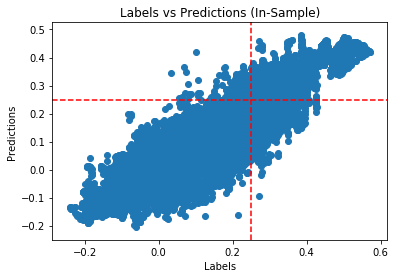

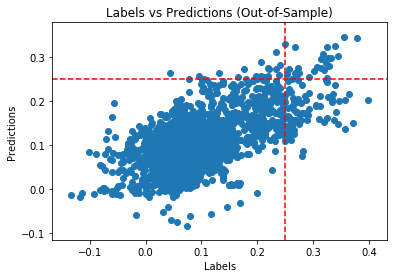

In [22]:
plt.scatter(y_train, y_train_hat)
plt.title("Labels vs Predictions (In-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

plt.scatter(y_test, y_test_hat)
plt.title("Labels vs Predictions (Out-of-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

In [23]:
predictive_df = pd.DataFrame({"label": y_test.values, "pred": y_test_hat[0]})
predictive_df = predictive_df.sort_values(by=["pred"], ascending=False)

predictive_df_25 = predictive_df.loc[predictive_df["pred"] >= .25]
top_10_predictions = predictive_df.head(n=10)
top_25_predictions = predictive_df.head(n=25)

mean_return_over_25 = np.mean(predictive_df_25["label"].values)
mean_return_top_10_predictions = np.mean(top_10_predictions["label"].values)
mean_return_top_25_predictions = np.mean(top_25_predictions["label"].values)

print("Mean return for predictions above 25%: ", mean_return_over_25)
print("Mean return for top 10 predictions: ", mean_return_top_10_predictions)
print("Mean return for top 25 predictions: ", mean_return_top_25_predictions)

Mean return for predictions above 25%:  0.24837584018296324
Mean return for top 10 predictions:  0.3139515294827161
Mean return for top 25 predictions:  0.28783196593490273
